# 逻辑回归(Logistic Regression)

## 目标：建立分类器（求解出三个参数Θ0、Θ1、Θ2）
## 设定阈值，根据阈值判断录取结果

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

data=pd.read_excel("C:\\Users\\ma\\Desktop\\唐宇迪-机器学习课程\\LogiReg_data.xlsx",header=None,names=["Exam1","Exam2","Admitted"])
print(data.head(3))
print("--"*15)
print(data.shape)

       Exam1      Exam2  Admitted
0  71.473170  18.577861         0
1  51.377207  57.218745         0
2  33.842663  38.711758         0
------------------------------
(70, 3)


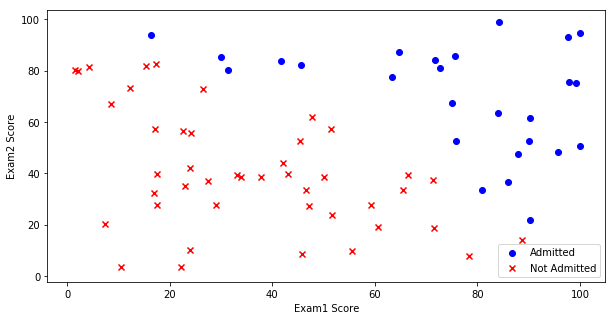

In [6]:
positive=data[data["Admitted"]==1]
negative=data[data["Admitted"]==0]

fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(positive["Exam1"],positive["Exam2"],c="b",marker="o",label="Admitted")
ax.scatter(negative["Exam1"],negative["Exam2"],c="r",marker="x",label="Not Admitted")
ax.legend()
ax.set_xlabel("Exam1 Score")
ax.set_ylabel("Exam2 Score")

# 要完成的模块
###        sigmoid:映射到概率的函数
###        model:返回预测结果值
###        cost:根据参数计算损失
###        gradient:计算每个参数的梯度方向
###        descent:进行参数更新
###        accuracy:计算精度

# sigmoid函数

### g:R->[0,1]
### g(0)=0.5

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

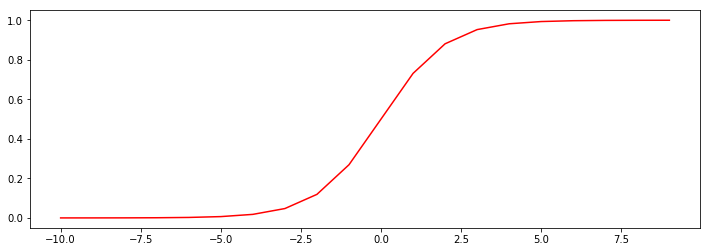

In [8]:
nums=np.arange(-10,10,step=1)
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(nums,sigmoid(nums),"r")

## 预测函数model

In [9]:
def model(X,theta):
    return sigmoid(np.dot(X,theta.T))

### 添加一列，值全为1

In [10]:
print(data.shape)
b=np.ones((70,1))
data=np.c_[b,data]
#convert the pandas representation of the data to an array useful for further 

cols=data.shape[1]
print(cols)
X=data[:,0:cols-1]
y=data[:,cols-1:cols]
theta=np.zeros([1,3])

(70, 3)
4


In [11]:
X[:5]

array([[  1.        ,  71.47316975,  18.57786122],
       [  1.        ,  51.37720697,  57.21874458],
       [  1.        ,  33.84266315,  38.71175769],
       [  1.        ,  46.63218054,  33.51295935],
       [  1.        ,  24.20302038,  55.85104737]])

In [12]:
y[:5]

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [13]:
theta

array([[ 0.,  0.,  0.]])

In [14]:
X.shape,y.shape,theta.shape

((70, 3), (70, 1), (1, 3))

# 损失函数cost

In [15]:
def cost(X,y,theta):
    left=np.multiply(-y,np.log(model(X,theta)))
    right=np.multiply(1-y,np.log(1-model(X,theta)))
    return np.sum(left-right)/(len(X))

In [16]:
cost(X,y,theta)

0.6931471805599454

## 计算梯度

In [17]:
def gradient(X,y,theta):
    grad=np.zeros(theta.shape)
    error=(model(X,theta)-y).ravel()
    for j in range(len(theta.ravel())):
        term=np.multiply(error,X[:,j])
        grad[0,1]=np.sum(term)/len(X)
        
    return grad

# Gradient descent

### 比较三种不同梯度下降方法

In [18]:
STOP_ITER=0
STOP_COST=1
STOP_GRAD=2

def stopCriterion(type,value,threshold):
    #设定三种不同的停止策略
    if type==STOP_ITER: return value>threshold
    elif type==STOP_COST: return abs(value[-1]-value[-2])<threshold
    elif type==STOP_GRAD: return np.linalg.norm(value)<threshold

### 洗牌 numpy的shuffle

In [19]:
import numpy.random
def shuffledata(data):
    np.random.shuffle(data)
    cols=data.shape[1]
    X=data[:,0:cols-1]
    y=data[:,cols-1:cols]
    return X,y

In [20]:
import time

def descent(data,theta,batchsize,stoptype,thresh,alpha):
    #梯度下降求解
    
    init_time=time.time()
    i=0   #迭代次数
    k=0   #batch
    X,y=shuffledata(data)
    grad=np.zeros(theta.shape)    #计算的梯度
    costs=[cost(X,y,theta)]
    
    while True:
        grad=gradient(X[k:k+batchsize],y[k:k+batchsize],theta)
        k+=batchsize    #取batchsize数量个数据
        if k>=n:
            k=0
            X,y=shuffledata(data)    #重新洗牌
        theta=theta-alpha*grad       #参数更新
        costs.append(cost(X,y,theta))   #计算新的损失
        i+=1
        
        if stoptype==STOP_ITER:      value=1
        elif stoptype==STOP_COST:    value=costs
        elif stoptype==STOP_GRAD:    value=grad
        if stopCriterion(stoptype,value,thresh):   break
        
    return theta,i-1,costs,grad,time.time()-init_time

In [21]:
def runExpe(data,theta,batchsize,stoptype,thresh,alpha):
    theta,Iter,costs,grad,dur=descent(data,theta,batchsize,stoptype,thresh,alpha)
    name="Original" if (data[:,1]>2).sum()>1 else "Scaled"
    name+="data-learning rate:{}-".format(alpha)
    if batchsize==n:  strDescType="Gradient"
    elif batchsize==1: strDescType="Stochastic"
    else:  strDescType="Mini-batch({})".format(batchsize)
    name+=strDescType+"descent-Stop:"
    if stoptype==STOP_ITER: strstop="{}iterrations".format(thresh)
    elif stoptype==STOP_COST: strstop="costs change<{}".format(thresh)
    else:  strstop="gradient norm<{}".format(thresh)
    name+=strstop
    print("***{}\nTheta:{}-Iter:{}-last cost:{:03.2f}-duration:{:03.2f}".format(
        name,theta,Iter,costs[-1],dur))
    fig,ax=plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)),costs,"r")
    ax.set_xlabel("iterations")
    ax.set_ylabel("cost")
    ax.set_title(name.upper()+"-Error vs iteration")
    return theta

### 不同的停止策略

### 设定迭代次数

In [ ]:
#选择的梯度下降方法是基于所有样本的
n=70
runExpe(data,theta,n,STOP_ITER,thresh=5000,alpha=0.000001)

### 根据损失值停止

### 设定阈值1E-6，差不多需要110000次迭代

In [ ]:
runExpe(data,theta,n,STOP_COST,thresh=0.000001,alpha=0.001)